In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [103]:

# Directory containing CSV files
data_directory = 'data'

# List to store DataFrames from each CSV file
dfs = []

# Iterate over CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dfs, ignore_index=True)


In [104]:
final_df

,user_id,timestamp,cctv_location
0,user-4,2024-01-02 15:14:27,CCTV-4
1,user-2,2024-01-02 15:14:28,CCTV-3
2,user-1,2024-01-02 15:14:29,CCTV-3
3,user-2,2024-01-02 15:14:30,CCTV-5
4,user-1,2024-01-02 15:14:31,CCTV-5
...,...,...,...
1282,user-33,2024-01-02 15:41:38,CCTV-39
1283,user-37,2024-01-02 15:41:38,CCTV-23
1284,user-26,2024-01-02 15:41:38,CCTV-25
1285,user-5,2024-01-02 15:41:38,CCTV-42


In [105]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])
final_df['date'] = final_df['timestamp'].dt.date
final_df['minutes'] = final_df['timestamp'].dt.hour * 60 + final_df['timestamp'].dt.minute


In [106]:
df = final_df

In [107]:
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['cctv_location'] = le.fit_transform(df['cctv_location'])

In [108]:
features = df[['user_id', 'cctv_location']]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


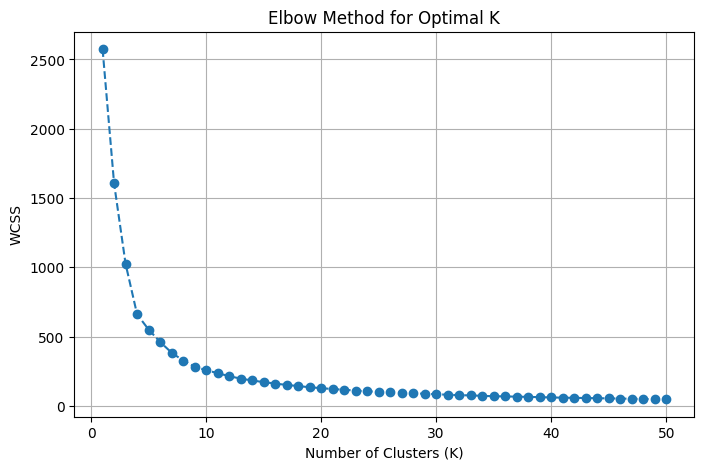

In [109]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_standardized)

# KMeans Elbow Method with the number of clusters equal to the number of unique CCTV locations
num_clusters = len(df['cctv_location'].unique())
wcss = []
for i in range(1, num_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)  # Use the PCA result instead of standardized features
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [115]:
# Using k-means clustering with k=3 (you can choose a different value based on your requirements)
kmeans = KMeans(n_clusters=7)
df['cluster'] = kmeans.fit_predict(features_standardized)

/home/nanda/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [116]:
silhouette_avg = silhouette_score(features_standardized, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3713650623005559


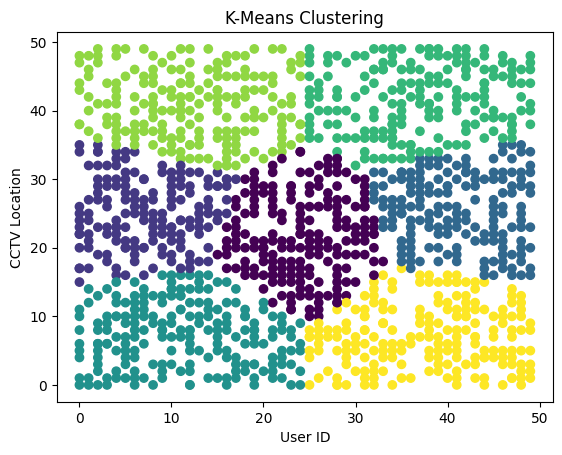

In [117]:
plt.scatter(df['user_id'], df['cctv_location'], c=df['cluster'], cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('CCTV Location')
plt.title('K-Means Clustering')
plt.show()

<h2>DBSCAN</h2>

In [118]:
from sklearn.cluster import DBSCAN

/tmp/ipykernel_90688/3460257513.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['minutes'] = pd.to_numeric(features['minutes'], errors='coerce')


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

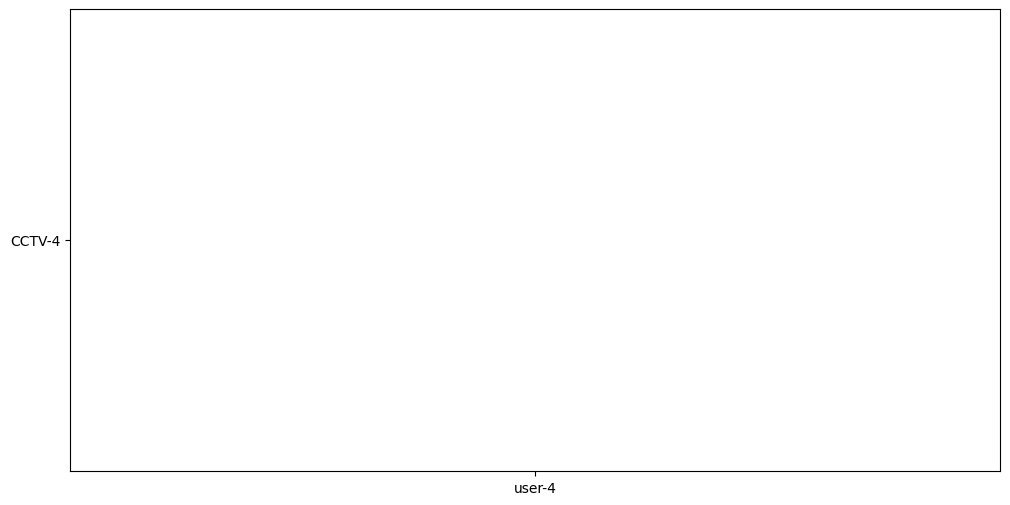

In [121]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Directory containing CSV files
data_directory = 'data'

# List to store DataFrames from each CSV file
dfs = []

# Iterate over CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dfs, ignore_index=True)

# Convert 'timestamp' to datetime
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])

# Create 'date' column
final_df['date'] = final_df['timestamp'].dt.date

# Extract minutes from timestamp
final_df['minutes'] = final_df['timestamp'].dt.hour * 60 + final_df['timestamp'].dt.minute

# DBSCAN Clustering
# Select relevant features
features = final_df[['minutes']]

# Convert 'minutes' to numeric values
features['minutes'] = pd.to_numeric(features['minutes'], errors='coerce')

# Drop rows with NaN values in 'minutes' column
features = features.dropna(subset=['minutes'])

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=3)
final_df['cluster'] = dbscan.fit_predict(features_standardized)

# Plotting User-CCTV Preferences
plt.figure(figsize=(12, 6))

sns.stripplot(x='user_id', y='cctv_location', data=final_df, hue='cluster', palette='viridis', size='cluster', jitter=True)
plt.title('User-CCTV Preferences (DBSCAN Clustering)')
plt.xlabel('User ID')
plt.ylabel('CCTV Location')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the plot
output_folder = 'plot'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'user_cctv_preferences_dbscan.png')
plt.savefig(output_file)

current_timestamp = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
print(f"[{current_timestamp}] Ran ")
